# Stage Analysis

In this notebook I analyze the time the program takes for each stage of the algorithm.
Here you will find the 3 versions:

1. Sequential
2. Parallel THR (Native C++ Threads)
3. Parallel FF (using Fast Flow Lib)


In [1]:
from b_tools.preprocess import get_standardized_measures

### Sequential (SEQ)

In [2]:
# Choose the file
DATASET=20

In [3]:
seq = get_standardized_measures(f"results/sequential_{DATASET}.csv")

In [4]:
seq.describe()

,READ,FREQCALC,HUFFBUILD,TOTAL
count,2.000000e+00,2.000000e+00,2.000000,2.000000e+00
mean,4.370175e+07,1.290751e+08,261825.000000,1.730387e+08
std,2.690819e+07,1.725408e+06,4502.855983,2.862910e+07
min,2.467479e+07,1.278551e+08,258641.000000,1.527949e+08
25%,3.418827e+07,1.284651e+08,260233.000000,1.629168e+08
50%,4.370175e+07,1.290751e+08,261825.000000,1.730387e+08
75%,5.321523e+07,1.296852e+08,263417.000000,1.831606e+08
max,6.272872e+07,1.302952e+08,265009.000000,1.932825e+08


In [5]:
seq_stages = list(seq.columns)
seq_stages.remove('TOTAL')
seq_means = [seq[stage].mean() for stage in seq_stages]

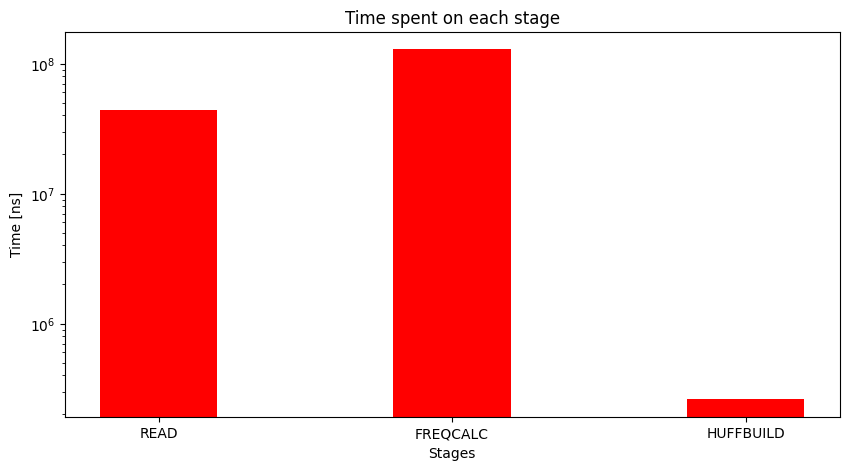

In [6]:
import matplotlib.pyplot as plt 
 
fig = plt.figure(figsize = (10, 5))
plt.bar(seq_stages, seq_means, color='red', width=0.4)
 
plt.xlabel("Stages")
plt.ylabel("Time [ns]")
plt.yscale('log')
plt.title("Time spent on each stage")
plt.show()

## Parallel (THR)

In [7]:
thr = get_standardized_measures(f'results/thr_{DATASET}.csv', excluded_columns=['P_DEGREE'])

In [8]:
def plot_for_p(p_degree, data):
    thr_data = data[data['P_DEGREE'] == p_degree]
    thr_stages = list(thr_data.columns)
    thr_stages.remove('TOTAL')
    thr_stages.remove('P_DEGREE')
    thr_means = [thr_data[stage].mean() for stage in thr_stages]
    fig = plt.figure(figsize = (10, 5))
    plt.bar(thr_stages, thr_means, color='blue', width=0.4)
    plt.xlabel("Stages")
    plt.ylabel("Time [ns]")
    plt.yscale('log')
    plt.title("Time spent on each stage")
    plt.show()

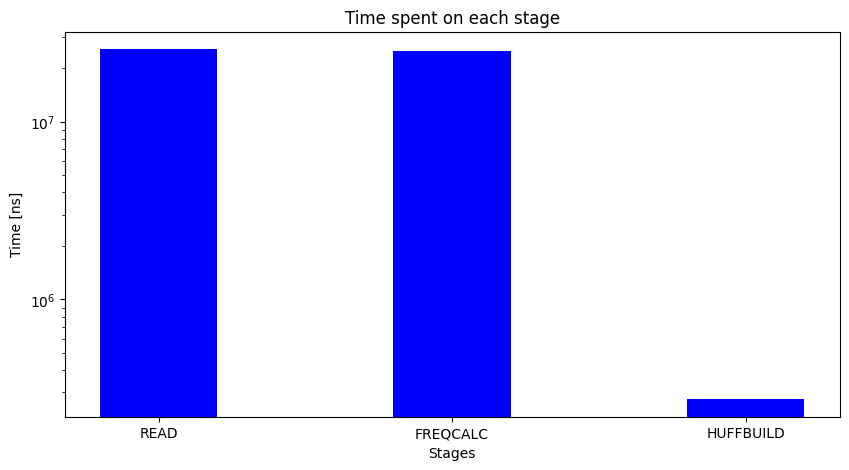

In [9]:
plot_for_p(6, thr)

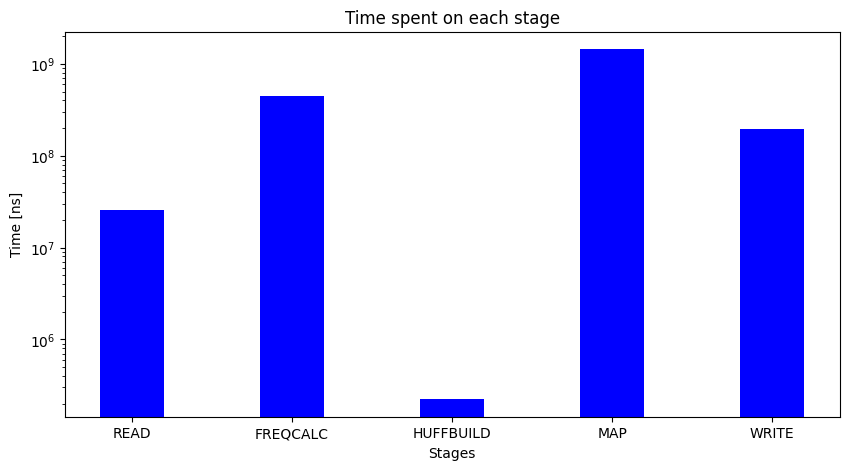

In [14]:
plot_for_p(11, thr)

In [11]:
thr[thr['TOTAL'] == thr['TOTAL'].max()]

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,WRITE,TOTAL
0,1,25686243,334842058,222887,2378245679,186629443,2925626310
